In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import datetime

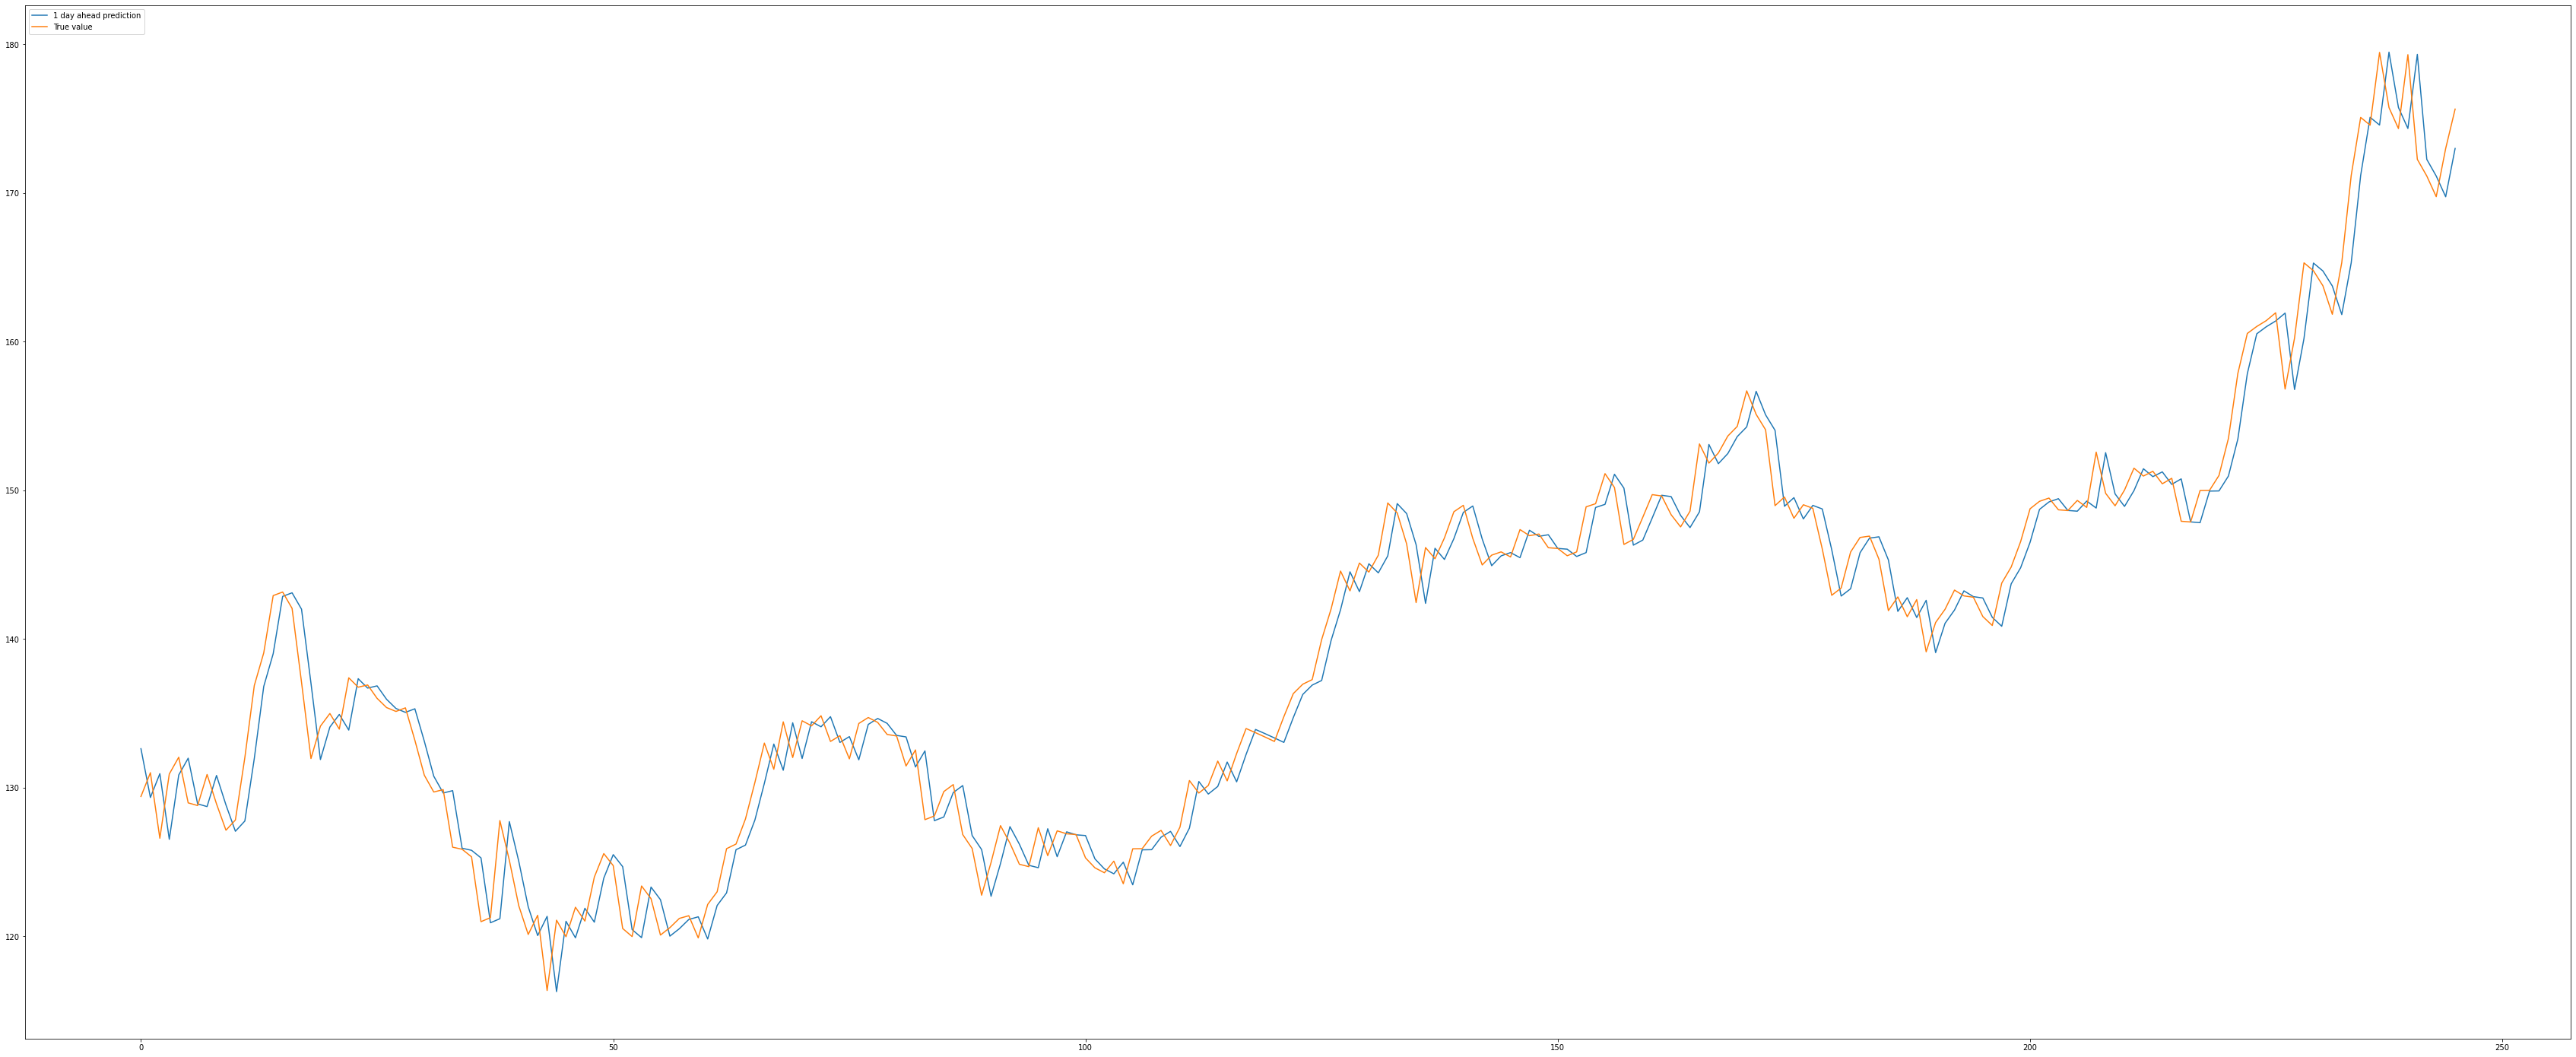

In [9]:
df = pd.read_csv("../data/processed/appl_stock_values.csv")

#split the data
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop(columns=["Open","Volume", "High", "Low", "Unnamed: 0"])
test = df[df["Date"] > datetime.datetime(2021, 1, 1)]
train = df[df["Date"] <= datetime.datetime(2021, 1, 1)]
lag_1_pred = []
#lag_2_pred = []
date = []

test = test.reset_index(drop=True)

for i in range(len(test)):
    model = AutoReg(train["Close"], lags = 1, old_names=False)
    model_fit = model.fit()
    lag_1_pred.append(model_fit.predict(start=len(train)+1, end=len(train)+1 ).iloc[0])
    #lag_2_pred.append(model_fit.predict(start=len(train)+1, end=len(train) +1).iloc[1])

    date.append(test.iloc[i]["Date"])
    train = train.append({"Close": test.iloc[i]["Close"], "Date":test.iloc[i]["Date"]}, ignore_index=True)

plt.figure(figsize=(60,25))
plt.plot(lag_1_pred, label = "1 day ahead prediction")
plt.plot(test["Close"], label = "True value")
plt.legend(loc="upper left")
plt.show()